## Liver Cirrhosis Stage Classification with k-NN, Decision Tree, Naive Bayes, SVM, and Simple Neural Network

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/liver-cirrhosis-stage-classification/liver_cirrhosis.csv


## Data Analysis

In [2]:
df = pd.read_csv('/kaggle/input/liver-cirrhosis-stage-classification/liver_cirrhosis.csv')
df.head()

N_Days Status     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0    2221      C  Placebo  18499   F       N            Y       N     N   
1    1230      C  Placebo  19724   M       Y            N       Y     N   
2    4184      C  Placebo  11839   F       N            N       N     N   
3    2090      D  Placebo  16467   F       N            N       N     N   
4    2105      D  Placebo  21699   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0   
1        0.5        219.0     3.93    22.0     663.0   45.00           75.0   
2        0.5        320.0     3.54    51.0    1243.0  122.45           80.0   
3        0.7        255.0     3.74    23.0    1024.0   77.50           58.0   
4        1.9        486.0     3.54    74.0    1052.0  108.50          109.0   

   Platelets  Prothrombin  Stage  
0      256.0          9.9      1  
1      220.0         10.8      2  
2      225.0         10.0      2  
3      151.0         10.2      2  
4      151.0         11.5      1

In [3]:
df.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [5]:
categorical_features = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
numerical_features = [column for column in df.columns if column not in categorical_features]

In [6]:
for feat in categorical_features:
    print(f"Number of Unique Values of {df[feat].value_counts()}")

Number of Unique Values of Status
C     13516
D      9456
CL     2028
Name: count, dtype: int64
Number of Unique Values of Drug
Placebo            15827
D-penicillamine     9173
Name: count, dtype: int64
Number of Unique Values of Sex
F    22137
M     2863
Name: count, dtype: int64
Number of Unique Values of Ascites
N    16798
Y     8202
Name: count, dtype: int64
Number of Unique Values of Hepatomegaly
N    15243
Y     9757
Name: count, dtype: int64
Number of Unique Values of Spiders
N    13614
Y    11386
Name: count, dtype: int64
Number of Unique Values of Edema
N    20220
S     3698
Y     1082
Name: count, dtype: int64


In [7]:
df['Stage'].value_counts()

Stage
2    8441
3    8294
1    8265
Name: count, dtype: int64

**Attribute Information:**
- N_Days: Number of days between registration and the earlier of death, transplantation, or study analysis time in 1986
- Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
- Drug: type of drug D-penicillamine or placebo
- Age: age in days
- Sex: M (male) or F (female)
- Ascites: presence of ascites N (No) or Y (Yes)
- Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
- Spiders: presence of spiders N (No) or Y (Yes)
- Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
- Bilirubin: serum bilirubin in [mg/dl]
- Cholesterol: serum cholesterol in [mg/dl]
- Albumin: albumin in [gm/dl]
- Copper: urine copper in [ug/day]
- Alk_Phos: alkaline phosphatase in [U/liter]
- SGOT: SGOT in [U/ml]
- Tryglicerides: triglicerides in [mg/dl]
- Platelets: platelets per cubic [ml/1000]
- Prothrombin: prothrombin time in seconds [s]
- Stage: histologic stage of disease ( 1, 2, or 3 )

## Preprocessing and Visualization

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoders = {}

for feat in categorical_features:
    le = LabelEncoder()
    df[feat] = le.fit_transform(df[feat])
    label_encoders[feat] = le
    print(f"Encoded Data of {df[feat].value_counts()}")

Encoded Data of Status
0    13516
2     9456
1     2028
Name: count, dtype: int64
Encoded Data of Drug
1    15827
0     9173
Name: count, dtype: int64
Encoded Data of Sex
0    22137
1     2863
Name: count, dtype: int64
Encoded Data of Ascites
0    16798
1     8202
Name: count, dtype: int64
Encoded Data of Hepatomegaly
0    15243
1     9757
Name: count, dtype: int64
Encoded Data of Spiders
0    13614
1    11386
Name: count, dtype: int64
Encoded Data of Edema
0    20220
1     3698
2     1082
Name: count, dtype: int64


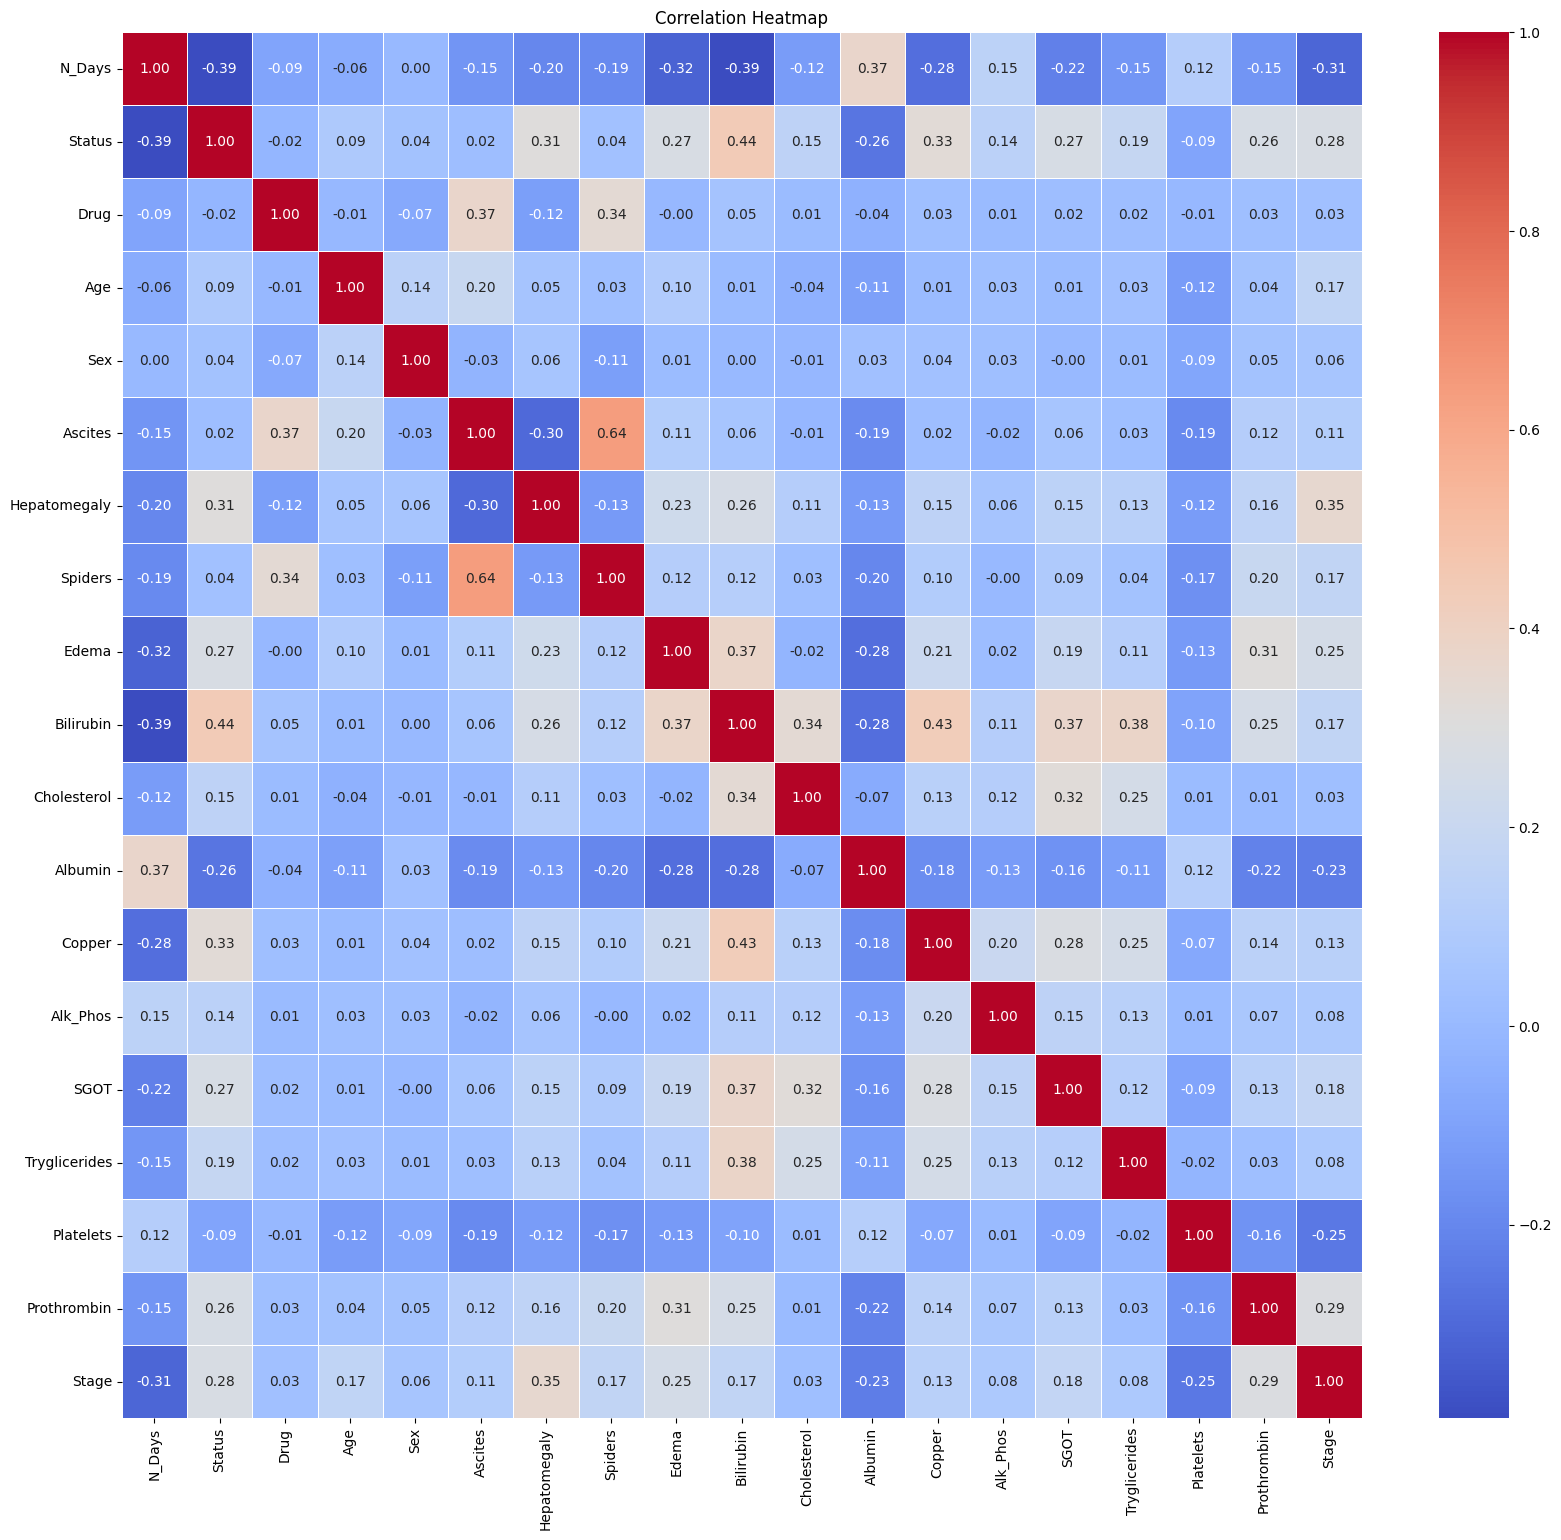

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


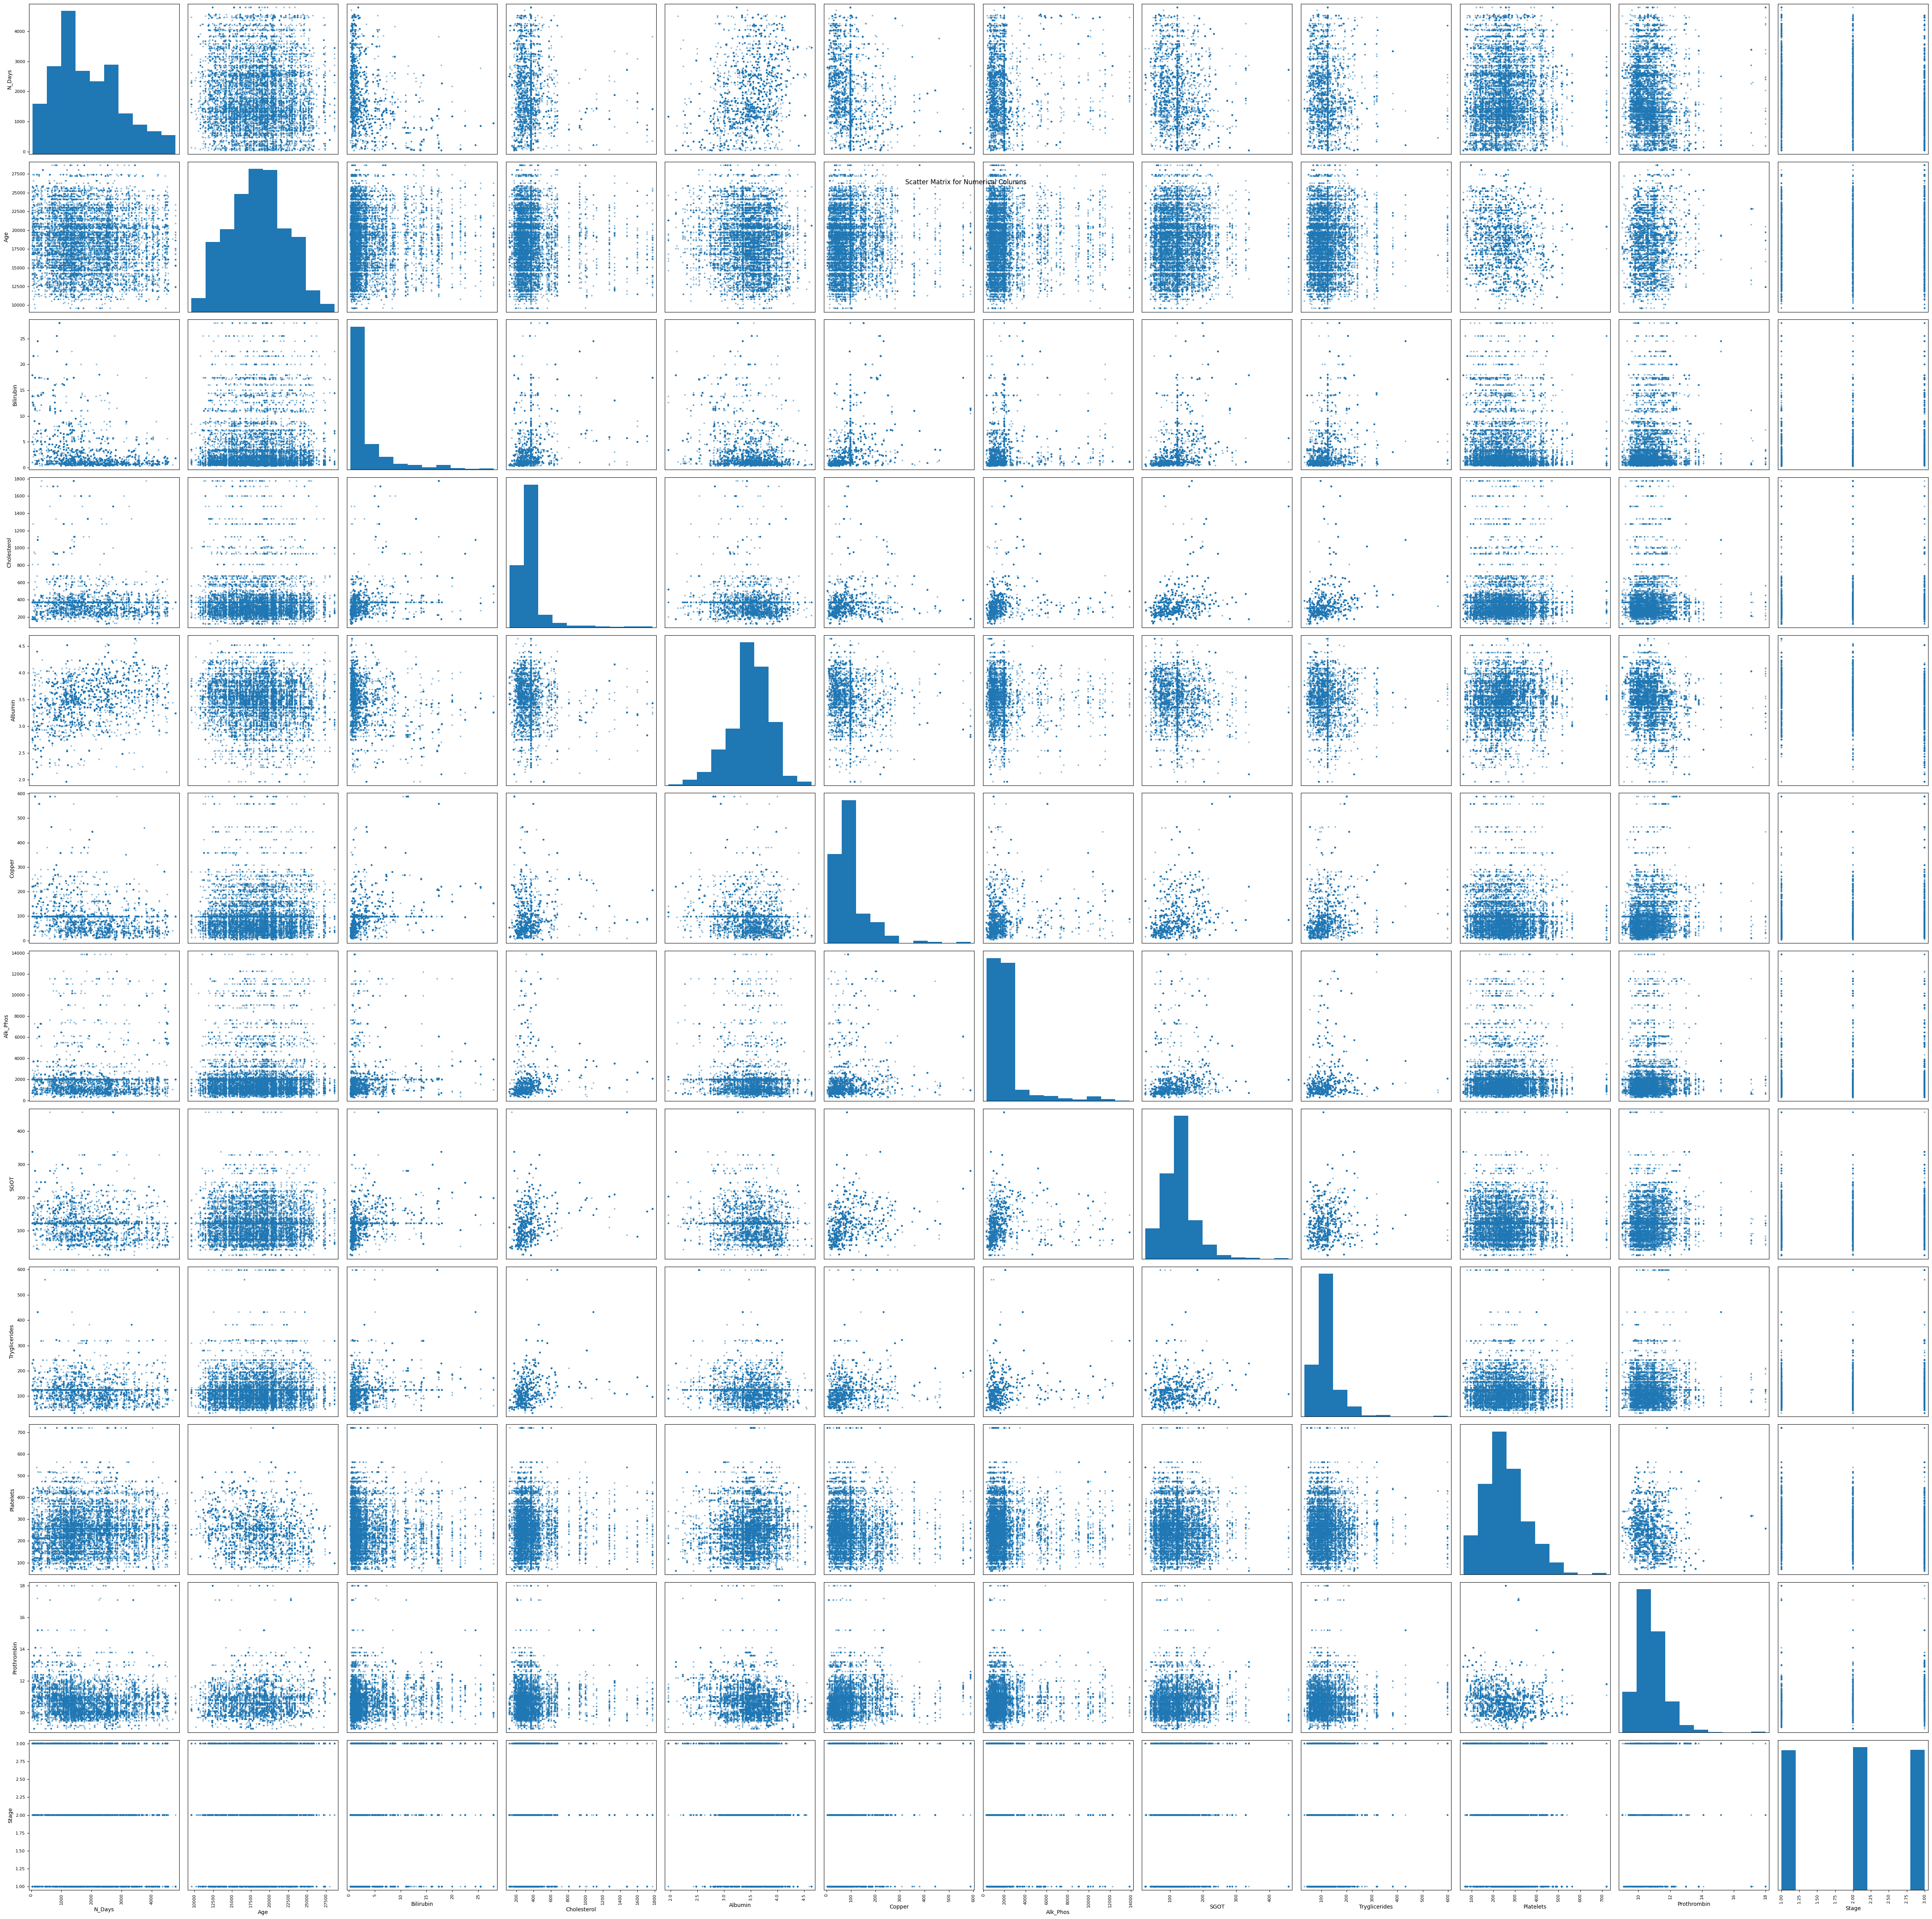

In [10]:
from pandas.plotting import scatter_matrix

# Create a scatter matrix
scatter_matrix(df[numerical_features], alpha=0.5, figsize=(50, 50), diagonal='hist')
plt.suptitle('Scatter Matrix for Numerical Columns', y=0.9)
plt.tight_layout()
plt.show()

## Classification With The Models

### Import Dependencies

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
# Decicion Tree
from sklearn.tree import DecisionTreeClassifier
# Naive Bayes Models
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
# SUpport Vector Machine
from sklearn.svm import SVC
# Artificial Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

2024-05-15 18:47:14.023755: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-15 18:47:14.023966: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-15 18:47:14.211102: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [12]:
X = df.drop('Stage', axis=1)
y = df['Stage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### k-NN

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose different values for n_neighbors

# Train the model
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred)
# Evaluate the performance
print("Accuracy:", knn_accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8902
Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.88      0.88      1657
           2       0.86      0.89      0.87      1697
           3       0.93      0.90      0.91      1646

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



In [14]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 31)}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Use the best model to predict
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred)
# Evaluate the best model
print("Accuracy with best parameters:", knn_accuracy)
print("Classification Report with best parameters:")
print(classification_report(y_test, y_pred))

Best parameters: {'n_neighbors': 1}
Best cross-validation accuracy: 0.9098500000000002
Accuracy with best parameters: 0.9136
Classification Report with best parameters:
              precision    recall  f1-score   support

           1       0.92      0.90      0.91      1657
           2       0.89      0.91      0.90      1697
           3       0.93      0.93      0.93      1646

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



### Decision Tree

In [15]:
dt =  DecisionTreeClassifier(random_state=42)
# Train the model
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred)
# Evaluate the performance
print("Accuracy:", dt_accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9168
Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.91      0.91      1657
           2       0.90      0.91      0.90      1697
           3       0.93      0.93      0.93      1646

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



### Gaussian Naive Bayes

In [16]:
gNB = GaussianNB()

# Train the model
gNB.fit(X_train, y_train)
y_pred = gNB.predict(X_test)

gNB_accuracy = accuracy_score(y_test, y_pred)
# Evaluate the performance
print("Accuracy:", gNB_accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.538
Classification Report:
              precision    recall  f1-score   support

           1       0.48      0.78      0.59      1657
           2       0.52      0.30      0.38      1697
           3       0.67      0.54      0.60      1646

    accuracy                           0.54      5000
   macro avg       0.56      0.54      0.52      5000
weighted avg       0.56      0.54      0.52      5000



### Bernoulli Naive Bayes

In [17]:
bNB = BernoulliNB()

# Train the model
bNB.fit(X_train, y_train)
y_pred = bNB.predict(X_test)

bNB_accuracy = accuracy_score(y_test, y_pred)
# Evaluate the performance
print("Accuracy:", bNB_accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5522
Classification Report:
              precision    recall  f1-score   support

           1       0.51      0.69      0.58      1657
           2       0.51      0.32      0.39      1697
           3       0.64      0.66      0.65      1646

    accuracy                           0.55      5000
   macro avg       0.55      0.55      0.54      5000
weighted avg       0.55      0.55      0.54      5000



### Support Vector Machine

In [18]:
svm = SVC()
# Train the model
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred)
# Evaluate the performance
print("Accuracy:", svm_accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8318
Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.83      0.82      1657
           2       0.79      0.82      0.81      1697
           3       0.90      0.84      0.87      1646

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000



### Artificial Neural Network

In [19]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

num_class = y_categorical.shape[1]

# Initialize the ANN
ann = Sequential()
ann.add(Input(shape=(X.shape[1],)))
ann.add(Dense(units=64, activation='relu'))
ann.add(Dense(units=32, activation='relu'))
ann.add(Dense(units=16, activation='relu'))
ann.add(Dense(units=num_class, activation='softmax'))

# Compile the model
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the ANN on the training data
history = ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5663 - loss: 0.9044 - val_accuracy: 0.7243 - val_loss: 0.6753
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7367 - loss: 0.6357 - val_accuracy: 0.7722 - val_loss: 0.5750
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7787 - loss: 0.5613 - val_accuracy: 0.8060 - val_loss: 0.5162
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8129 - loss: 0.4847 - val_accuracy: 0.8058 - val_loss: 0.5087
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8297 - loss: 0.4531 - val_accuracy: 0.8320 - val_loss: 0.4699
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8331 - loss: 0.4422 - val_accuracy: 0.8322 - val_loss: 0.4519
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8506 - loss: 0.4081 - val_accuracy: 0.8457 - val_loss: 0.4347
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8597 - loss: 0.3860 - val_accuracy: 0.

In [20]:
test_loss, test_accuracy = ann.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')
ann_accuracy = test_accuracy

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8796 - loss: 0.4213
Test accuracy: 0.8830000162124634


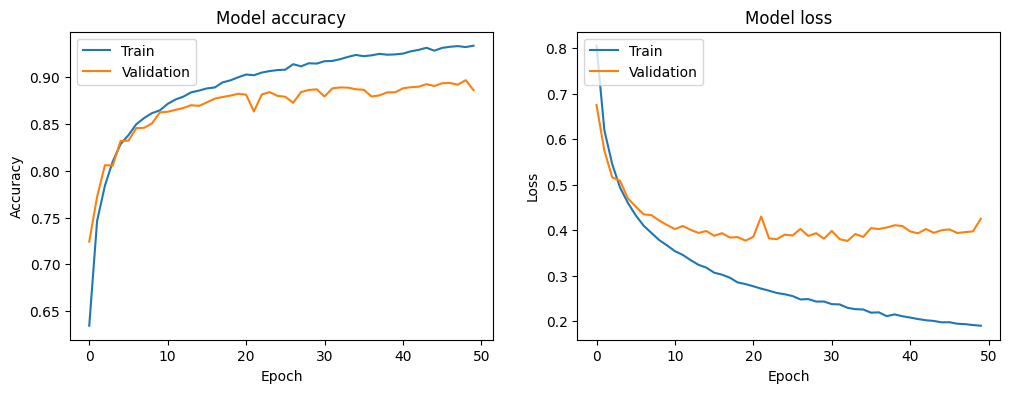

In [21]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Accuracy For k-NN:  0.9136
Accuracy For Decicion Tree:  0.9168
Accuracy For Gaussian NB:  0.538
Accuracy For Bernoulli NB:  0.5522
Accuracy For k-NN:  0.8318
Accuracy For k-NN:  0.8830000162124634


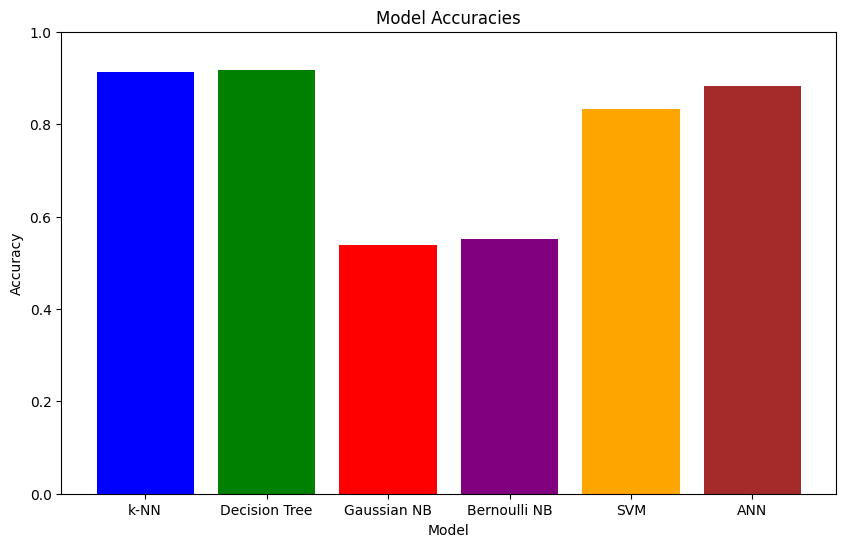

In [22]:
models = ['k-NN', 'Decision Tree', 'Gaussian NB', 'Bernoulli NB', 'SVM', 'ANN']
accuracies = [knn_accuracy, dt_accuracy, gNB_accuracy, bNB_accuracy, svm_accuracy, ann_accuracy]
print("Accuracy For k-NN: ", knn_accuracy)
print("Accuracy For Decicion Tree: ", dt_accuracy)
print("Accuracy For Gaussian NB: ", gNB_accuracy)
print("Accuracy For Bernoulli NB: ", bNB_accuracy)
print("Accuracy For k-NN: ", svm_accuracy)
print("Accuracy For k-NN: ", ann_accuracy)

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
plt.ylim([0, 1])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()

## Conclusion

The best performing model for this specific classification task is Decicion Tree